# Data with time stamps with Pandas

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data reading

In [2]:
!ls

AdM_TM_TNTXM_daily.csv	data_processing_pandas.ipynb


In [15]:
data = pd.read_csv("AdM_TM_TNTXM_daily.csv", header = 0)
data.columns = ["date", "tmean", "trash"]
data

date  tmean  trash
0     01.03.2007  -12.0  -12.3
1     02.03.2007  -12.1  -11.3
2     03.03.2007  -11.2  -10.8
3     04.03.2007  -11.0  -11.9
4     05.03.2007  -10.7  -10.5
...          ...    ...    ...
4572  06.09.2019   -4.0   -4.0
4573  07.09.2019   -6.5   -5.4
4574  08.09.2019   -9.5   -8.1
4575  09.09.2019   -8.1   -9.1
4576  10.09.2019   -5.5   -5.6

[4577 rows x 3 columns]

In [25]:
# DATE PROCESSING
def get_day(s):
    return int(s.split(".")[0])
def get_month(s):
    return int(s.split(".")[1])
def get_year(s):
    return int(s.split(".")[2])

data["year"] = data.date.map(get_year)
data["month"] = data.date.map(get_month)
data["day"] = data.date.map(get_day)
data

date  tmean  trash  year  month  day
0     01.03.2007  -12.0  -12.3  2007      3    1
1     02.03.2007  -12.1  -11.3  2007      3    2
2     03.03.2007  -11.2  -10.8  2007      3    3
3     04.03.2007  -11.0  -11.9  2007      3    4
4     05.03.2007  -10.7  -10.5  2007      3    5
...          ...    ...    ...   ...    ...  ...
4572  06.09.2019   -4.0   -4.0  2019      9    6
4573  07.09.2019   -6.5   -5.4  2019      9    7
4574  08.09.2019   -9.5   -8.1  2019      9    8
4575  09.09.2019   -8.1   -9.1  2019      9    9
4576  10.09.2019   -5.5   -5.6  2019      9   10

[4577 rows x 6 columns]

## Data processing

In [34]:
mean_temp = data.groupby(["year", "month"]).mean()[ ["tmean",]]
mean_temp

tmean
year month           
2007 3     -13.406452
     4      -6.770000
     5      -6.467742
     6      -3.153333
     7      -2.332258
...               ...
2019 5      -7.983871
     6       0.906667
     7       1.106452
     8       0.916129
     9      -3.360000

[151 rows x 1 columns]

In [36]:
mean_temp.loc[2007]

tmean
month           
3     -13.406452
4      -6.770000
5      -6.467742
6      -3.153333
7      -2.332258
8      -2.202258
9      -4.464333
10     -5.154839
11    -10.896667
12    -14.412903

<IPython.core.display.Javascript object>


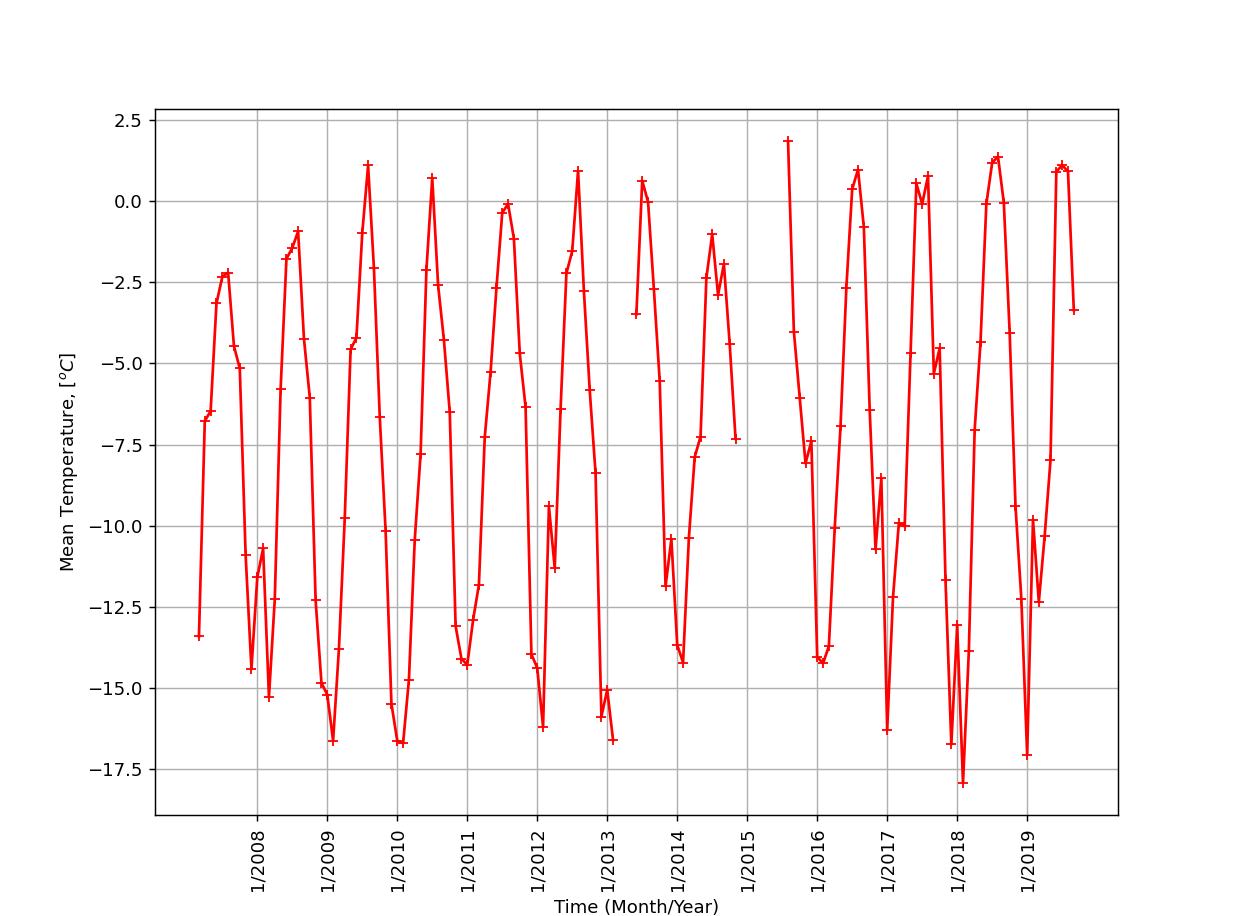

In [61]:
xticksv = []
xticks = []
index =  mean_temp.index.values
xv = np.arange(len(index))
for i in range(len(index)):
    y, m = index[i]
    if m == 1:
        xticksv.append(xv[i])
        xticks.append("{0}/{1}".format(m,y))
        

plt.figure()
plt.plot(mean_temp.tmean.values, "+r-")
plt.grid()
plt.xlabel("Time (Month/Year)")
plt.ylabel("Mean Temperature, [$^o C$]")
plt.xticks(xticksv, xticks, rotation='vertical')
plt.show()